# Laptop Pricing Analysis

This notebook explores the pricing of laptops using data cleaning, feature engineering, and visualization.

Steps included:
- Load and clean data
- Map categorical codes to meaningful labels
- Basic data exploration and summaries
- Visualization with correlation heatmaps, scatterplots, boxplots
- Grouped heatmap analysis
- Pearson correlation analysis

## 1. Import libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

## 2. Load dataset and clean
We load the laptop pricing dataset from the URL and remove redundant unnamed columns.

In [11]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(url)
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## 3. Map numerical categories to human-readable labels
This helps make plots and analysis easier to interpret.

In [12]:
gpu_mapping = {1: "GTX 1050", 2: "RTX 3070", 3: "RTX 4080"}
os_mapping = {1: "Windows", 2: "Linux"}
category_mapping = {1: "Gaming", 2: "Business", 3: "Ultrabook", 4: "Workstation", 5: "Convertible"}

df['GPU'] = df['GPU'].replace(gpu_mapping)
df['OS'] = df['OS'].replace(os_mapping)
df['Category'] = df['Category'].replace(category_mapping)

df[['Category', 'GPU', 'OS']].head()

,Category,GPU,OS
0,Workstation,RTX 3070,Windows
1,Ultrabook,GTX 1050,Windows
2,Ultrabook,GTX 1050,Windows
3,Workstation,RTX 3070,Windows
4,Workstation,RTX 3070,Windows


## 4. Data Summary
Numeric and categorical summaries provide an overview of dataset characteristics.

In [13]:
print("--- Numeric Summary ---")
print(df.describe().T)

print("\n--- Categorical Summary ---")
print(df.describe(include=['object']).T)

--- Numeric Summary ---
                  count         mean         std         min          25%  \
CPU_core          238.0     5.630252    1.241787    3.000000     5.000000   
Screen_Size_inch  238.0    14.688655    1.166045   12.000000    14.000000   
CPU_frequency     238.0     0.813822    0.141860    0.413793     0.689655   
RAM_GB            238.0     7.882353    2.482603    4.000000     8.000000   
Storage_GB_SSD    238.0   245.781513   34.765316  128.000000   256.000000   
Weight_pounds     238.0     4.106221    1.078442    1.786050     3.246863   
Price             238.0  1462.344538  574.607699  527.000000  1066.500000   
Screen-Full_HD    238.0     0.676471    0.468809    0.000000     0.000000   
Screen-IPS_panel  238.0     0.323529    0.468809    0.000000     0.000000   

                          50%          75%       max  
CPU_core             5.000000     7.000000     7.000  
Screen_Size_inch    15.000000    15.600000    17.300  
CPU_frequency        0.862069     0.9310

## 5. Correlation Matrix Heatmap
Visualize correlations among numeric features.

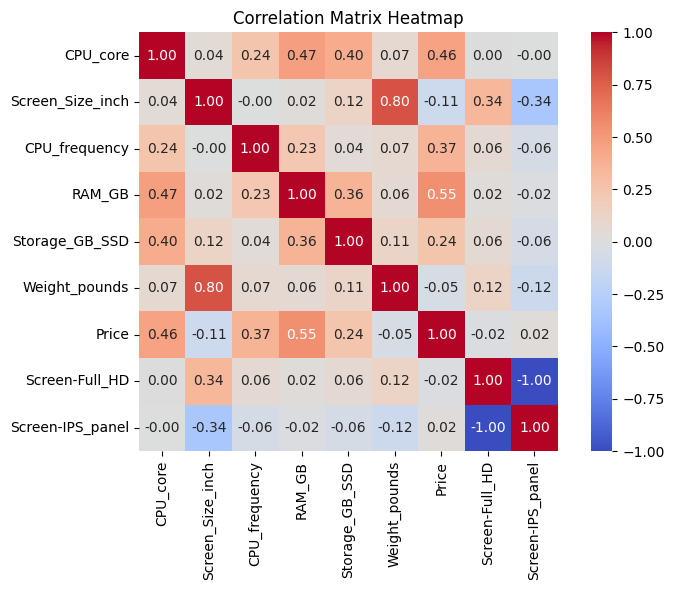

In [14]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## 6. Scatter Plots: Numeric features vs Price
Exploring linear relationships between some key numeric features and Price.

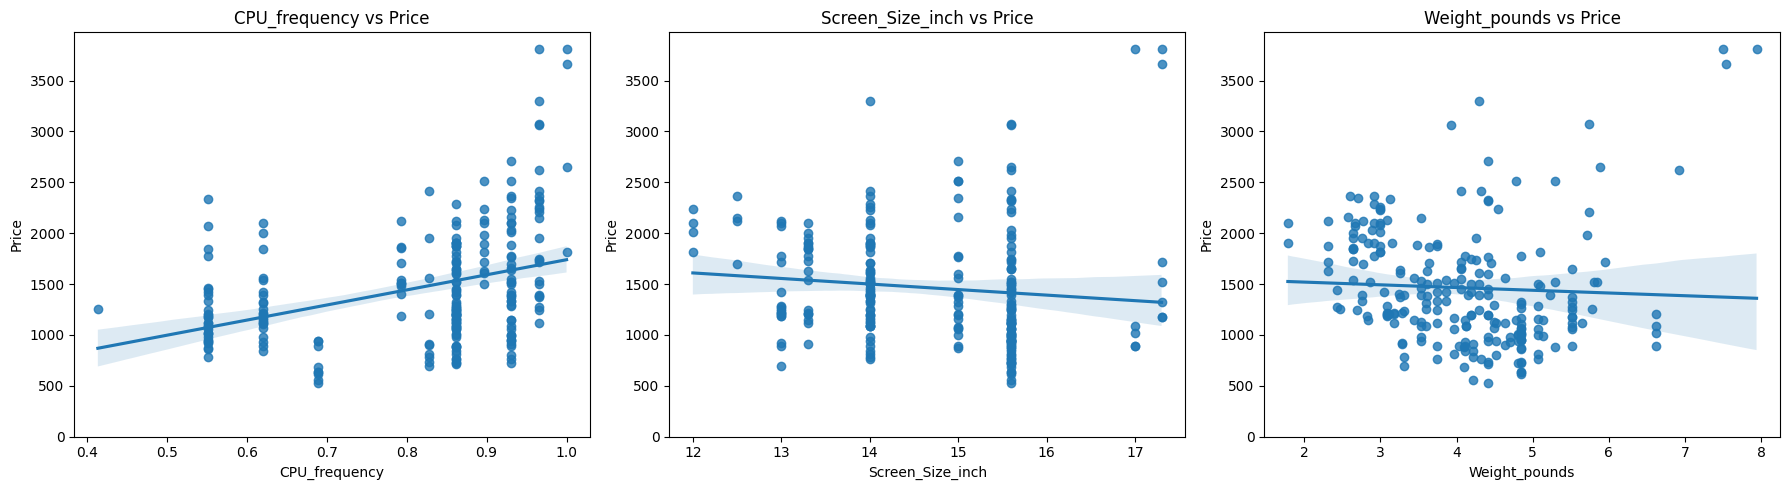

In [15]:
numeric_features = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, feature in zip(axes, numeric_features):
    sns.regplot(x=feature, y="Price", data=df, ax=ax)
    ax.set_title(f"{feature} vs Price")
    ax.set_ylim(0,)
plt.tight_layout()
plt.show()

## 7. Boxplots for categorical features
Price distribution across different categories like GPU, OS, RAM, etc.

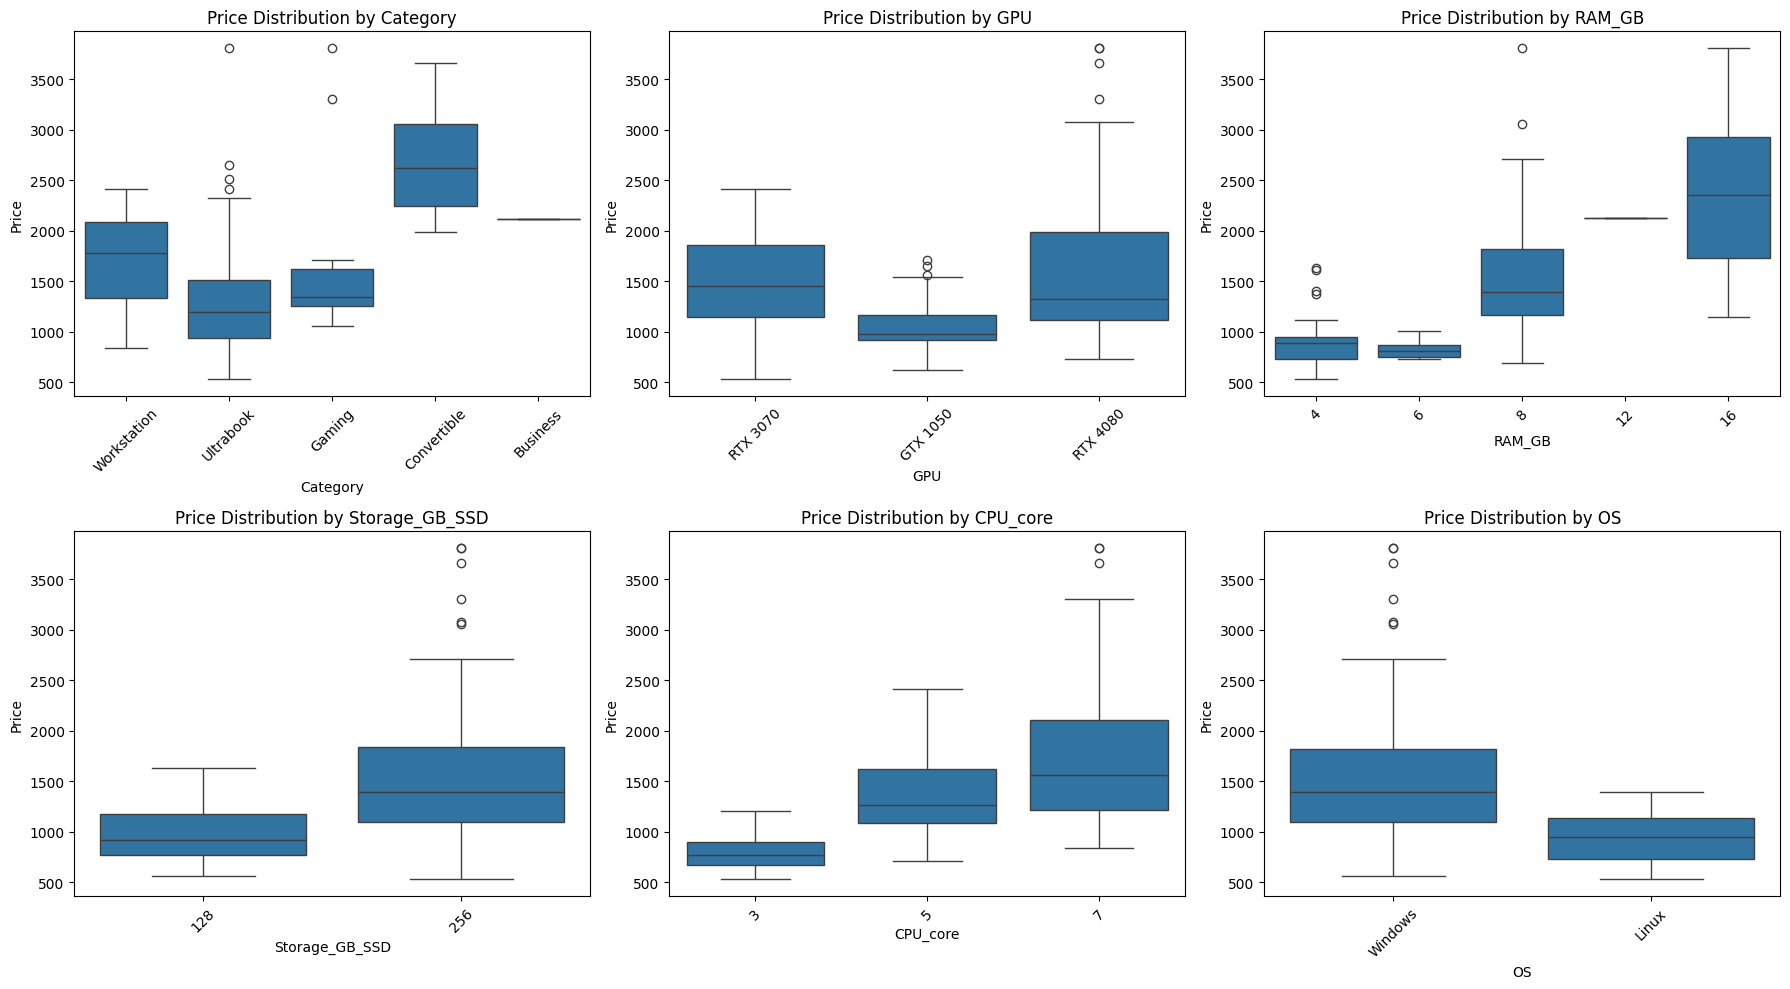

In [16]:
categorical_features = ["Category", "GPU", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS"]
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()
for ax, col in zip(axes, categorical_features):
    sns.boxplot(x=col, y="Price", data=df, ax=ax)
    ax.set_title(f"Price Distribution by {col}")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 8. Grouped Heatmap: Average Price by GPU and CPU Core Count

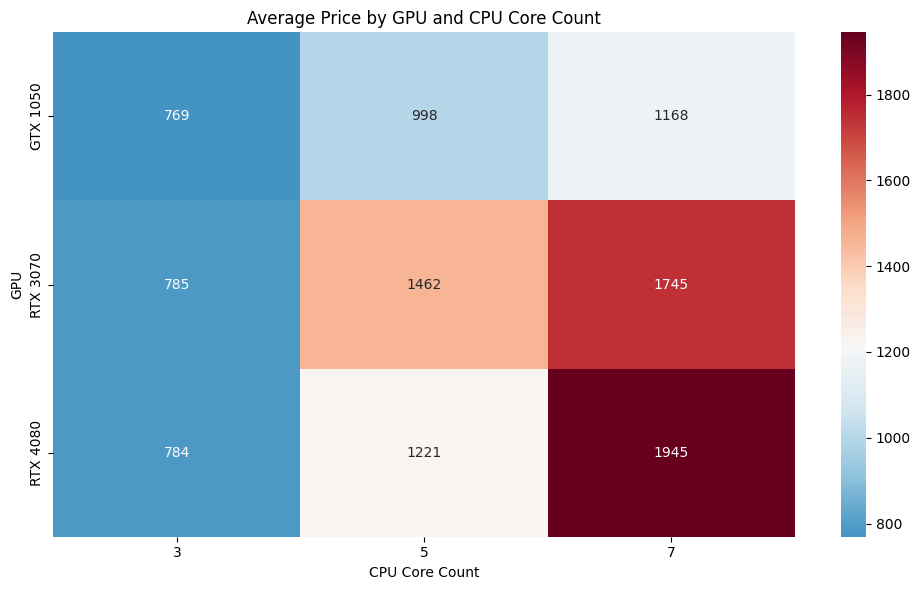

In [17]:
grouped = df.groupby(['GPU', 'CPU_core'])['Price'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(grouped, annot=True, fmt='.0f', cmap='RdBu_r', center=grouped.mean().mean())
plt.title('Average Price by GPU and CPU Core Count')
plt.ylabel('GPU')
plt.xlabel('CPU Core Count')
plt.tight_layout()
plt.show()

## 9. Pearson Correlations with Price
Calculating Pearson correlation coefficients between Price and other features.

In [18]:
print("--- Pearson Correlations with Price ---")
for param in numeric_features + categorical_features:
    if df[param].dtype == 'object':
        encoded = pd.factorize(df[param])[0]
        coef, p_val = stats.pearsonr(encoded, df['Price'])
    else:
        coef, p_val = stats.pearsonr(df[param], df['Price'])
    print(f"{param}: Correlation = {coef:.3f}, p-value = {p_val:.3g}")

--- Pearson Correlations with Price ---
CPU_frequency: Correlation = 0.367, p-value = 5.5e-09
Screen_Size_inch: Correlation = -0.111, p-value = 0.0885
Weight_pounds: Correlation = -0.050, p-value = 0.44
Category: Correlation = 0.125, p-value = 0.054
GPU: Correlation = 0.084, p-value = 0.199
RAM_GB: Correlation = 0.549, p-value = 3.68e-20
Storage_GB_SSD: Correlation = 0.243, p-value = 0.000149
CPU_core: Correlation = 0.459, p-value = 7.91e-14
OS: Correlation = -0.222, p-value = 0.00057
